<a href="https://colab.research.google.com/github/vanhoanglong213/Tensorflow_187/blob/master/flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import os
import glob
import shutil
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL, 
                                   fname="flower_photos.tgz", 
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228818944/228813984 [==============================] - 2s 0us/step


In [4]:
os.listdir(base_dir)

['daisy', 'dandelion', 'tulips', 'roses', 'sunflowers', 'LICENSE.txt']

In [0]:
classes = ['roses', 'tulips', 'daisy', 'dandelion', 'sunflowers']

In [6]:
for cl in classes:
  img_path = os.path.join(base_dir,cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]  
  
  for t in train:
    if not os.path.exists(os.path.join(base_dir,'train', cl)):
      os.makedirs(os.path.join(base_dir,'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  
  for v in val:
    if not os.path.exists(os.path.join(base_dir,'val', cl)):
      os.makedirs(os.path.join(base_dir,'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))


roses: 641 Images
tulips: 799 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images


In [0]:
train_dir = os.path.join(base_dir, 'train')

val_dir = os.path.join(base_dir, 'val')

In [0]:
batch_size = 100
IMG_SHAPE = 150

In [9]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.15,
      height_shift_range=0.15,
      #shear_range=0.2,
      zoom_range=0.5,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size, 
                                                     directory=train_dir, 
                                                     shuffle=True, 
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 2935 images belonging to 5 classes.


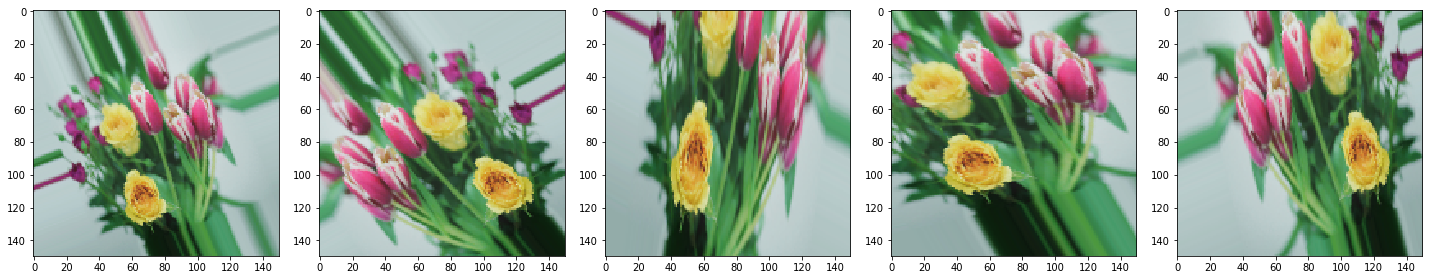

In [10]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,5, figsize =(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()
  
augumented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augumented_images)

In [11]:
image_gen_val = ImageDataGenerator(rescale = 1./255)
val_data_gen =  image_gen_val.flow_from_directory(batch_size=batch_size, 
                                                 directory=val_dir, 
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 735 images belonging to 5 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
epochs = 80
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=30,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=30
)

Epoch 1/80
30/30 [==============================] - 39s 1s/step - loss: 1.3856 - acc: 0.3782 - val_loss: 1.3107 - val_acc: 0.4631
Epoch 2/80
30/30 [==============================] - 31s 1s/step - loss: 1.1796 - acc: 0.5097 - val_loss: 1.0847 - val_acc: 0.5929
Epoch 3/80
30/30 [==============================] - 31s 1s/step - loss: 1.0990 - acc: 0.5574 - val_loss: 1.0206 - val_acc: 0.6335
Epoch 4/80
30/30 [==============================] - 31s 1s/step - loss: 1.0211 - acc: 0.5864 - val_loss: 0.9394 - val_acc: 0.6364
Epoch 5/80
30/30 [==============================] - 31s 1s/step - loss: 0.9379 - acc: 0.6170 - val_loss: 0.8615 - val_acc: 0.6938
Epoch 6/80
30/30 [==============================] - 31s 1s/step - loss: 0.9060 - acc: 0.6453 - val_loss: 0.8068 - val_acc: 0.6923
Epoch 7/80
30/30 [==============================] - 31s 1s/step - loss: 0.8667 - acc: 0.6542 - val_loss: 0.7923 - val_acc: 0.6952
Epoch 8/80
30/30 [==============================] - 31s 1s/step - loss: 0.8231 - acc: 0.67

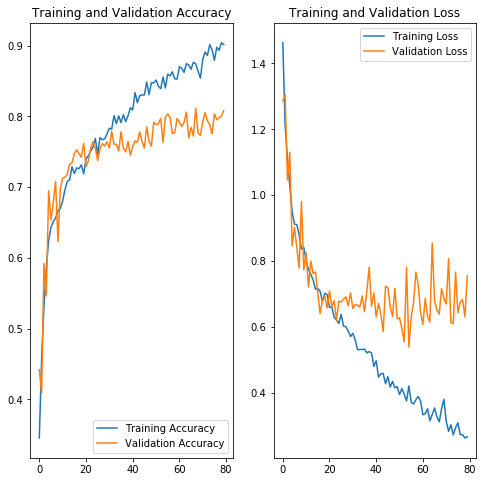

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()